In [173]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn import datasets

In [174]:
#making our dataset
n_pts = 500 #number of point and samples of our training set

x , y = datasets.make_circles(n_samples = n_pts , random_state = 123 , noise = 0.1 , factor = 0.3)
#noise is for area of each class - wide or centralized
#factor is size of inner circle in compare to outer circle(1 will give two circles of the same size) 
#more less the factor is, more centralized inner point will be with no hole
#fuunction datasets.make_circles will return numpy arrays not tensors

x_data = torch.Tensor(x)
y_data = torch.Tensor(y.reshape([500,1]))

In [175]:
def scatter_plot():
    #just make sure u r using numpy shape of x and y to sketch them
    plt.scatter(x[y==0 , 0] , x[y==0 , 1])
    plt.scatter(x[y==1 , 0] , x[y==1 , 1])

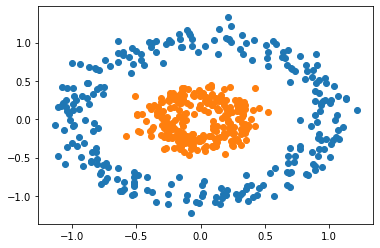

In [176]:
scatter_plot()

In [177]:
class Model(nn.Module):
    def __init__(self , input_size ,H1, output_size):
        super().__init__() #as we are having one hidden layer H1 should pronounce that
        
#as we need this dataset to be classified with at least 3 lines so we need at least 2 layers, so we declare 2 linear regression 
        self.Linear1 = nn.Linear(input_size , H1)
        self.Linear2 = nn.Linear(H1 , output_size)
        
        
    def forward(self,x):
        pred = torch.sigmoid(self.Linear1(x))
        pred = torch.sigmoid(self.Linear2(pred))
        return pred
    
    
    def predict(self , x):
        pred = self.forward(x)
        if pred >= 0.5:
            return 1
        else:
            return 0

In [178]:
#declare an object for our dataset to train
torch.manual_seed(2)
model = Model(2 , 4 , 1) #4 is nodes of hidden layer wich is optional
print(list(model.parameters())) #list is for showing them
#no matter how much parameter it has. it will return all of them based on input size

#the result obey the following method
#the output of each layer's result tensor = nummber of next layer's nodes * input node of this layer -> x=(4*2)

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


In [179]:
#training
#activation function and error

#errors : BCE or MSE
#activation function : sigmoid(SGD) or Adam(for multi classification we use softmax) 
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [180]:
#train

epochs = 1000
losses = []
for i in range(epochs):
    y_pred = model.forward(x_data)
    loss = criterion(y_pred , y_data) # make sure u use tensor not an array format of y
    print("epoch = ", i , "loss = ", loss.item())
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch =  0 loss =  0.7148517370223999
epoch =  1 loss =  0.6947298645973206
epoch =  2 loss =  0.6955171227455139
epoch =  3 loss =  0.7014943361282349
epoch =  4 loss =  0.7014063000679016
epoch =  5 loss =  0.6974823474884033
epoch =  6 loss =  0.6939413547515869
epoch =  7 loss =  0.6928801536560059
epoch =  8 loss =  0.6939679384231567
epoch =  9 loss =  0.6954845190048218
epoch =  10 loss =  0.6959452033042908
epoch =  11 loss =  0.6950198411941528
epoch =  12 loss =  0.6932969093322754
epoch =  13 loss =  0.6916024088859558
epoch =  14 loss =  0.6904666423797607
epoch =  15 loss =  0.6898934245109558
epoch =  16 loss =  0.6894485354423523
epoch =  17 loss =  0.68858802318573
epoch =  18 loss =  0.6869858503341675
epoch =  19 loss =  0.6846491694450378
epoch =  20 loss =  0.6818140745162964
epoch =  21 loss =  0.678755521774292
epoch =  22 loss =  0.6756355166435242
epoch =  23 loss =  0.6724446415901184
epoch =  24 loss =  0.6690382957458496
epoch =  25 loss =  0.6652314066886902

epoch =  260 loss =  0.020627228543162346
epoch =  261 loss =  0.020539652556180954
epoch =  262 loss =  0.02045278437435627
epoch =  263 loss =  0.020366618409752846
epoch =  264 loss =  0.020281145349144936
epoch =  265 loss =  0.02019636146724224
epoch =  266 loss =  0.020112257450819016
epoch =  267 loss =  0.020028820261359215
epoch =  268 loss =  0.019946055486798286
epoch =  269 loss =  0.01986393705010414
epoch =  270 loss =  0.01978246681392193
epoch =  271 loss =  0.01970164105296135
epoch =  272 loss =  0.01962144672870636
epoch =  273 loss =  0.01954188011586666
epoch =  274 loss =  0.01946294493973255
epoch =  275 loss =  0.019384609535336494
epoch =  276 loss =  0.019306888803839684
epoch =  277 loss =  0.019229775294661522
epoch =  278 loss =  0.01915324665606022
epoch =  279 loss =  0.019077306613326073
epoch =  280 loss =  0.01900194212794304
epoch =  281 loss =  0.01892716810107231
epoch =  282 loss =  0.0188529584556818
epoch =  283 loss =  0.018779318779706955
epoch

epoch =  506 loss =  0.009734969586133957
epoch =  507 loss =  0.00971129909157753
epoch =  508 loss =  0.00968771893531084
epoch =  509 loss =  0.009664218872785568
epoch =  510 loss =  0.009640803560614586
epoch =  511 loss =  0.009617472998797894
epoch =  512 loss =  0.009594222530722618
epoch =  513 loss =  0.009571051225066185
epoch =  514 loss =  0.009547966532409191
epoch =  515 loss =  0.00952495913952589
epoch =  516 loss =  0.009502038359642029
epoch =  517 loss =  0.009479193948209286
epoch =  518 loss =  0.009456436149775982
epoch =  519 loss =  0.009433751925826073
epoch =  520 loss =  0.009411145001649857
epoch =  521 loss =  0.00938862469047308
epoch =  522 loss =  0.009366176091134548
epoch =  523 loss =  0.009343807585537434
epoch =  524 loss =  0.009321525692939758
epoch =  525 loss =  0.009299308992922306
epoch =  526 loss =  0.009277175180613995
epoch =  527 loss =  0.009255118668079376
epoch =  528 loss =  0.0092331413179636
epoch =  529 loss =  0.00921123661100864

epoch =  750 loss =  0.005737523082643747
epoch =  751 loss =  0.0057262578047811985
epoch =  752 loss =  0.005715023726224899
epoch =  753 loss =  0.00570382084697485
epoch =  754 loss =  0.005692644044756889
epoch =  755 loss =  0.005681496579200029
epoch =  756 loss =  0.0056703779846429825
epoch =  757 loss =  0.005659284070134163
epoch =  758 loss =  0.005648224148899317
epoch =  759 loss =  0.005637186113744974
epoch =  760 loss =  0.005626180209219456
epoch =  761 loss =  0.005615199916064739
epoch =  762 loss =  0.005604246165603399
epoch =  763 loss =  0.005593323614448309
epoch =  764 loss =  0.005582423880696297
epoch =  765 loss =  0.005571556277573109
epoch =  766 loss =  0.005560708697885275
epoch =  767 loss =  0.005549893248826265
epoch =  768 loss =  0.005539102014154196
epoch =  769 loss =  0.005528342444449663
epoch =  770 loss =  0.005517605692148209
epoch =  771 loss =  0.005506900139153004
epoch =  772 loss =  0.0054962122812867165
epoch =  773 loss =  0.005485556

epoch =  986 loss =  0.003689507022500038
epoch =  987 loss =  0.0036828273441642523
epoch =  988 loss =  0.0036761544179171324
epoch =  989 loss =  0.003669498022645712
epoch =  990 loss =  0.003662853967398405
epoch =  991 loss =  0.0036562206223607063
epoch =  992 loss =  0.0036496014799922705
epoch =  993 loss =  0.0036429951433092356
epoch =  994 loss =  0.0036364016123116016
epoch =  995 loss =  0.0036298187915235758
epoch =  996 loss =  0.0036232490092515945
epoch =  997 loss =  0.003616692963987589
epoch =  998 loss =  0.003610148560255766
epoch =  999 loss =  0.0036036206874996424


Text(0, 0.5, 'loss')

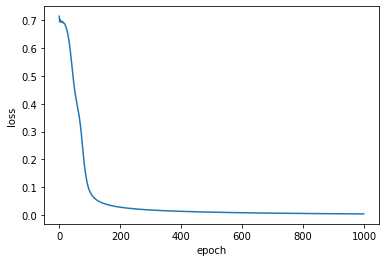

In [181]:
plt.plot(range(epochs) , losses) #make sure u use range
plt.xlabel('epoch')
plt.ylabel('loss')

In [186]:
#the ploting like above is not s.th we need for this dataset
#def plot_classes(title):
#    plt.title = title

#we use above
def plot_class_boundry(x1 , x2):
    #for ploting in codes befor we first determined the range of axis by x1 = np.array([-2 , 2])
    #here we determine the like this
    x_span = np.linspace(min(x[:, 0]) , max(x[:, 0]))#,3 gives us three items
        #it gives us minimum and the maximum horizontal values which are 0 and 1.5 according to the plot
    y_span = np.linspace(min(x[:, 1]) , max(x[:, 1])) #yo can add numbers to them to fit visualization
        #it gives us minimum and the maximum vertical values which are 0 and 1.5 according to the plot
        #print(x_span, y_span)
    
    xx , yy = np.meshgrid(x_span , y_span) #vectorize to make matrix by coping it
    grid = torch.Tensor(np.c_[xx.ravel() , yy.ravel()])
        #to make xx 1 dimensional as it has two dimension-> ravel  to make it column wise arrangment -> np.c
    pred_func = model.forward(grid)
    z = pred_func.view(xx.shape).detach().numpy()
    
    plt.contourf(xx, yy,z)

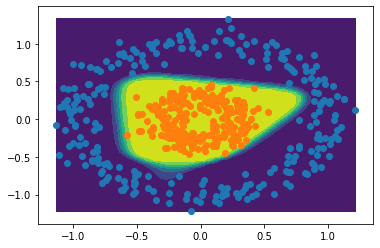

In [187]:
plot_class_boundry(x,y)
scatter_plot()

prediction is =  1


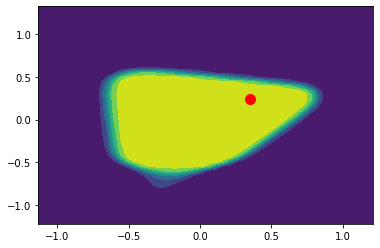

In [192]:
#test

a = 0.35
b = 0.24

point = torch.Tensor([a,b])
prediction = model.predict(point)
plt.plot([a] , [b] , marker = 'o' , markersize = 10 , color = "red")
print("prediction is = " , prediction)
plot_class_boundry(a , b)